In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
from ydata_profiling import profile_report

In [27]:
#load dataset
df=pd.read_csv('patient data.csv')

In [28]:
df.shape

(4999, 35)

In [29]:
df.head(3)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0.0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,NaN,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0.0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0


In [30]:
df.isnull().sum()

PatientID                     0
State                         0
Sex                           0
GeneralHealth                 2
AgeCategory                   0
HeightInMeters               45
WeightInKilograms             1
BMI                           5
HadHeartAttack                5
HadAngina                     0
HadStroke                     0
HadAsthma                     0
HadSkinCancer                 0
HadCOPD                       0
HadDepressiveDisorder         0
HadKidneyDisease              0
HadArthritis                  0
HadDiabetes                   0
DeafOrHardOfHearing           0
BlindOrVisionDifficulty       0
DifficultyConcentrating       0
DifficultyWalking             0
DifficultyDressingBathing     1
DifficultyErrands             0
SmokerStatus                  0
ECigaretteUsage               0
ChestScan                     0
RaceEthnicityCategory         0
AlcoholDrinkers               0
HIVTesting                    0
FluVaxLast12                  0
PneumoVa

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  4999 non-null   int64  
 1   State                      4999 non-null   object 
 2   Sex                        4999 non-null   object 
 3   GeneralHealth              4997 non-null   object 
 4   AgeCategory                4999 non-null   object 
 5   HeightInMeters             4954 non-null   float64
 6   WeightInKilograms          4998 non-null   float64
 7   BMI                        4994 non-null   float64
 8   HadHeartAttack             4994 non-null   float64
 9   HadAngina                  4999 non-null   int64  
 10  HadStroke                  4999 non-null   int64  
 11  HadAsthma                  4999 non-null   int64  
 12  HadSkinCancer              4999 non-null   int64  
 13  HadCOPD                    4999 non-null   int64

In [32]:
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,4999.000000,4954.000000,4998.000000,4994.000000,4994.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,...,4999.000000,4998.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,1.707893,84.227697,28.792535,0.059471,0.068214,0.04901,0.145229,0.078216,0.087217,...,0.164433,0.042017,0.074815,0.441488,0.50050,0.377075,0.476295,0.384477,0.041008,0.332066
std,1443.231328,0.105670,21.215180,6.484308,0.236528,0.252137,0.21591,0.352367,0.268537,0.282182,...,0.370705,0.200648,0.263119,0.496614,0.50005,0.484703,0.499488,0.486520,0.198329,0.471002
min,1.000000,1.220000,35.380001,12.940000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,1.630000,68.949997,24.370001,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,1.700000,81.650002,27.785001,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.500000,1.780000,95.250000,31.930000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4999.000000,2.160000,249.479996,91.550003,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.duplicated().sum()

0

In [34]:
df.dtypes

PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack               float64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing    float64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                      int64
R

In [35]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [36]:
datacolumns=['State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'HadHeartAttack', 'HadAngina', 
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

In [37]:
type(datacolumns)

list

In [38]:
for i in datacolumns:
    print(df[i].value_counts()," \n=======\n=======")

State
Alaska     2831
Alabama    1880
Arizona     288
Name: count, dtype: int64  
Sex
Female    2633
Male      2366
Name: count, dtype: int64  
GeneralHealth
Very good    1719
Good         1616
Excellent     754
Fair          665
Poor          243
Name: count, dtype: int64  
AgeCategory
Age 65 to 69       613
Age 60 to 64       567
Age 70 to 74       534
Age 55 to 59       489
Age 50 to 54       392
Age 75 to 79       358
Age 80 or older    357
Age 45 to 49       347
Age 40 to 44       326
Age 35 to 39       320
Age 30 to 34       251
Age 18 to 24       238
Age 25 to 29       207
Name: count, dtype: int64  
HeightInMeters
1.63    434
1.78    428
1.70    420
1.68    415
1.65    395
1.75    362
1.73    359
1.83    347
1.80    313
1.60    311
1.57    267
1.85    201
1.55    160
1.52    155
1.88    127
1.91     73
1.93     55
1.50     47
1.47     21
1.96     21
1.98     18
1.45      6
2.01      6
1.42      4
1.22      3
2.03      2
1.35      1
1.76      1
2.16      1
1.53      1
Name: coun

In [39]:
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns


In [ ]:
num_featureslist=['HeightInMeters', 'WeightInKilograms', 'BMI']

In [ ]:
pairplotdf=df[num_featureslist]

In [ ]:
sns.pairplot(data=pairplotdf,plot_kws={'color': 'skyblue'}, diag_kws={'color': 'skyblue'})
plt.show()

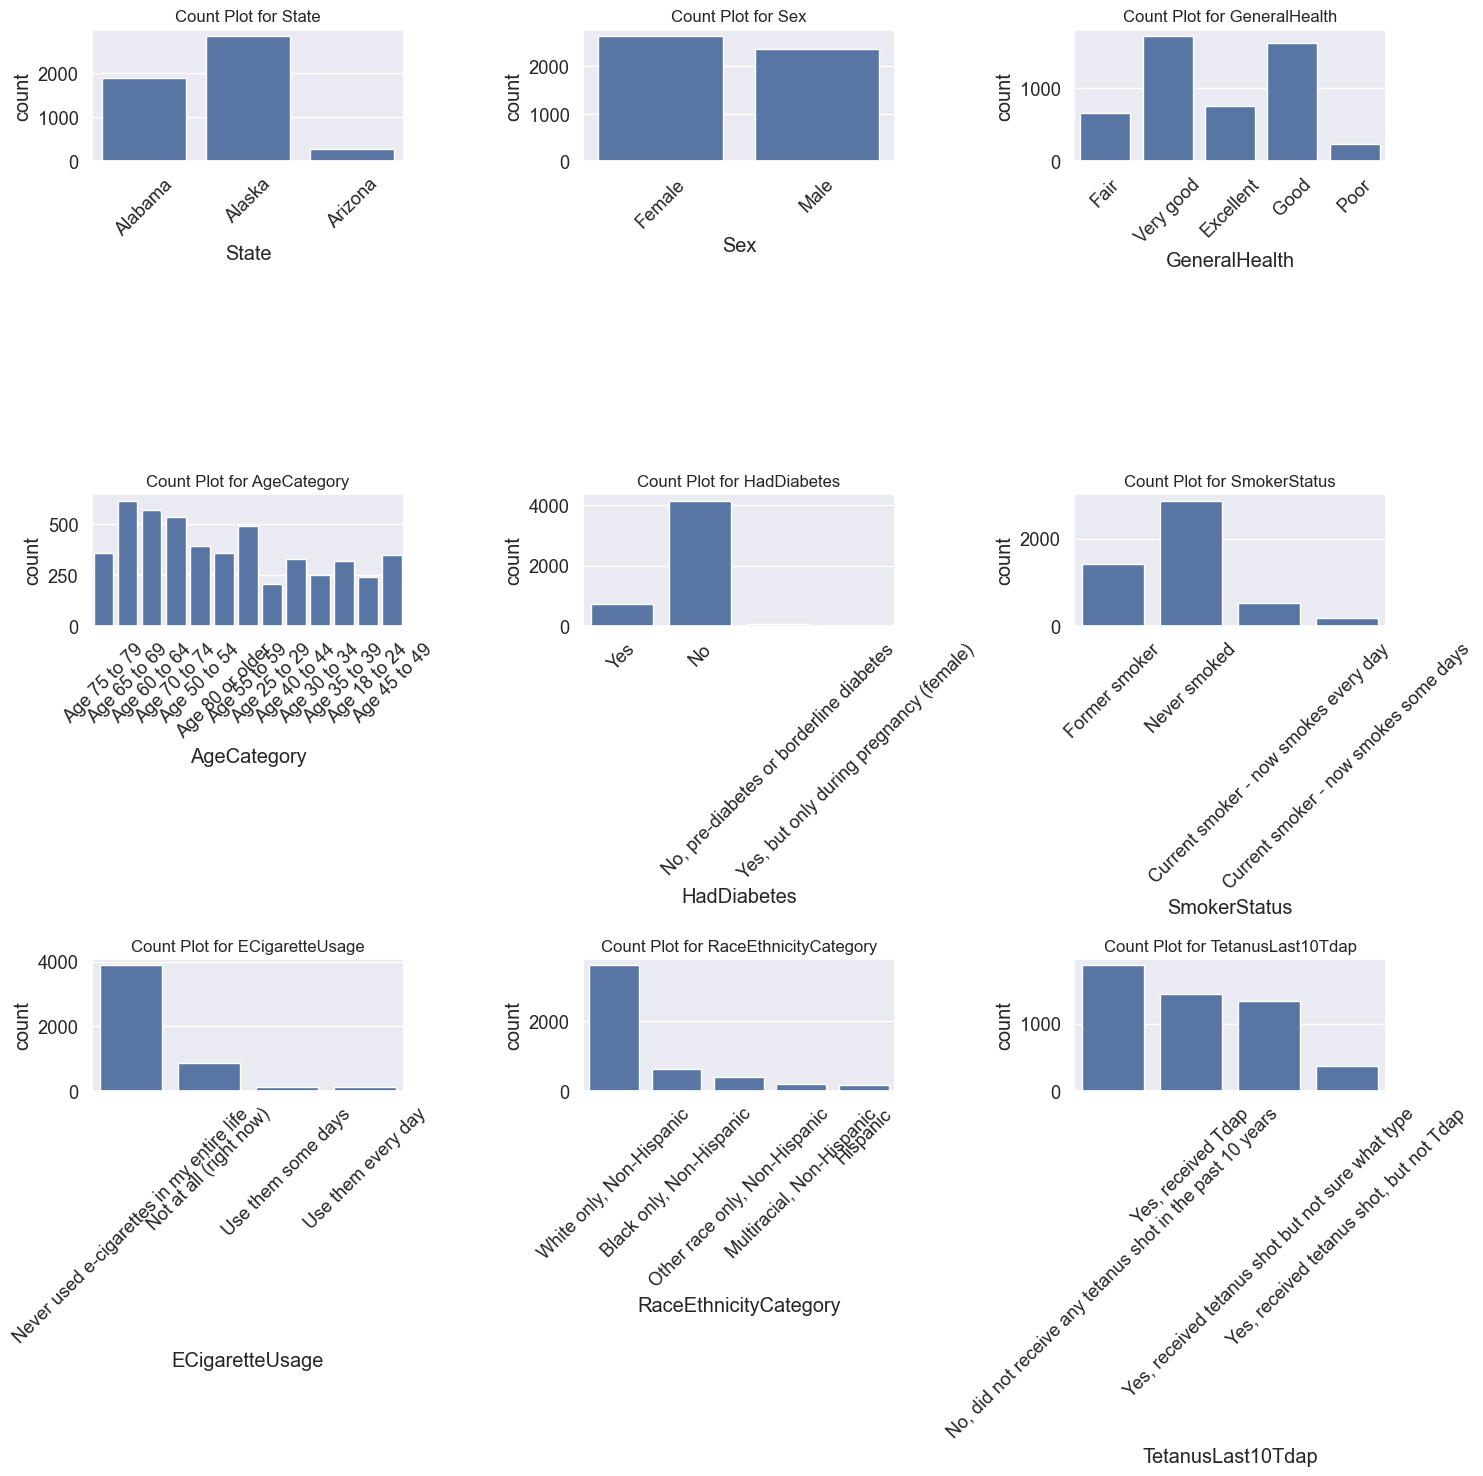

In [40]:
# Adjust the figure size and layout for better visualization
fig, ax = plt.subplots(
    nrows=int(np.ceil(len(cat_features) / 3)), 
    ncols=3, 
    figsize=(15, 5 * int(np.ceil(len(cat_features) / 3)))  # Dynamically adjust figure size
)

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Loop through categorical features and create count plots
for i, column in enumerate(cat_features):
    sns.countplot(data=df, x=column, ax=ax[i])
    ax[i].set_title(f"Count Plot for {column}", fontsize=12)  # Add a title
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(len(cat_features), len(ax)):
    fig.delaxes(ax[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


In [42]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [43]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[numeric_columns])
df.head(3)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,1,11,1.63,84.820000,32.099998,0.0,1,...,0,1,4,0,0,0,1,0,0,1
1,2,0,0,4,9,1.60,71.669998,27.990000,NaN,0,...,0,0,4,0,0,1,1,1,0,0
2,3,0,1,0,8,1.78,71.209999,22.530001,0.0,0,...,0,0,4,1,0,0,0,2,0,0


In [44]:
# Define the target column
target_column = 'HadDiabetes'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
imputer = SimpleImputer(strategy='mean')
imputed_col = ['HeightInMeters','BMI','HadHeartAttack','WeightInKilograms','DifficultyDressingBathing']
df[imputed_col]= imputer.fit_transform(df[imputed_col])
df.isnull().sum()

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

In [46]:
top = df['GeneralHealth'].value_counts().head(6)
top

GeneralHealth
4    1719
2    1616
0     754
1     665
3     243
5       2
Name: count, dtype: int64

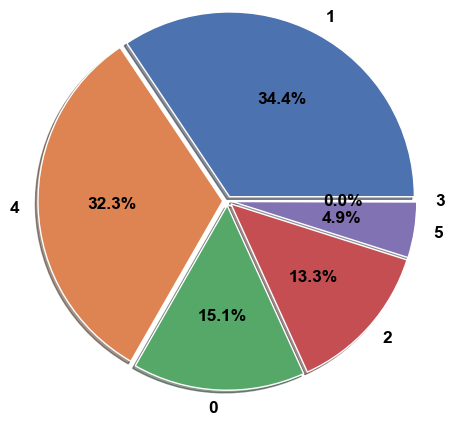

In [47]:
plt.figure(figsize=(4,3))
plt.pie(top,labels = df['GeneralHealth'].unique()[0:6],autopct='%1.1f%%',radius=2,explode = (0.05,0.05, 0.05,0.05,0.05,0.05),shadow=True,textprops={'color':'black','weight':'bold','fontsize':12.5})
plt.show()

In [48]:
df['SmokerStatus'].value_counts()

SmokerStatus
3    2866
2    1420
0     535
1     178
Name: count, dtype: int64

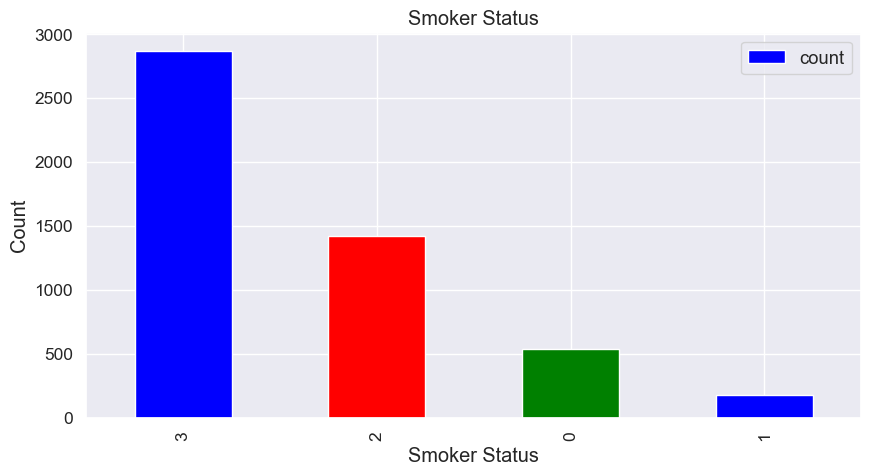

In [49]:
df['SmokerStatus'].value_counts().plot(kind='bar',color=['blue','red','green'],figsize=(10,5),title='Smoker Status',xlabel='Smoker Status',ylabel='Count',grid=True,legend=True,fontsize=12.5)
plt.show()

Text(0.5, 0, 'BMI')

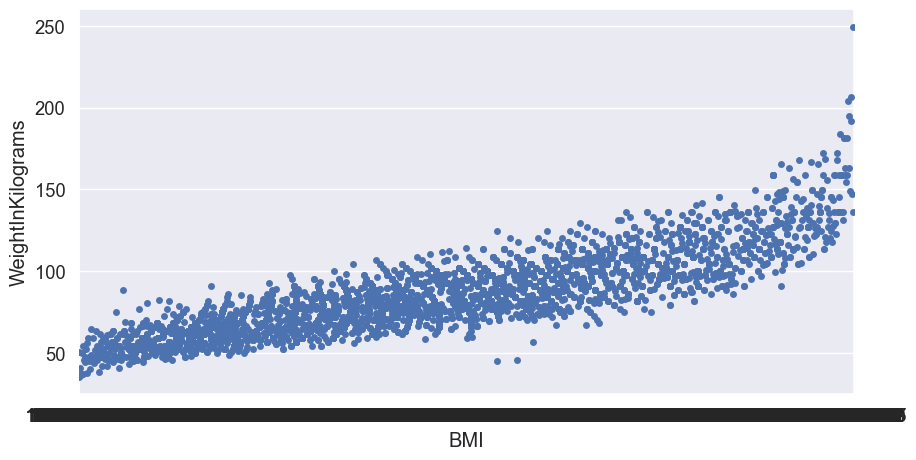

In [50]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x='BMI', y= 'WeightInKilograms',data= df)
plt.ylabel('WeightInKilograms')
plt.xlabel('BMI')

Text(0.5, 0, 'HeightInMeters')

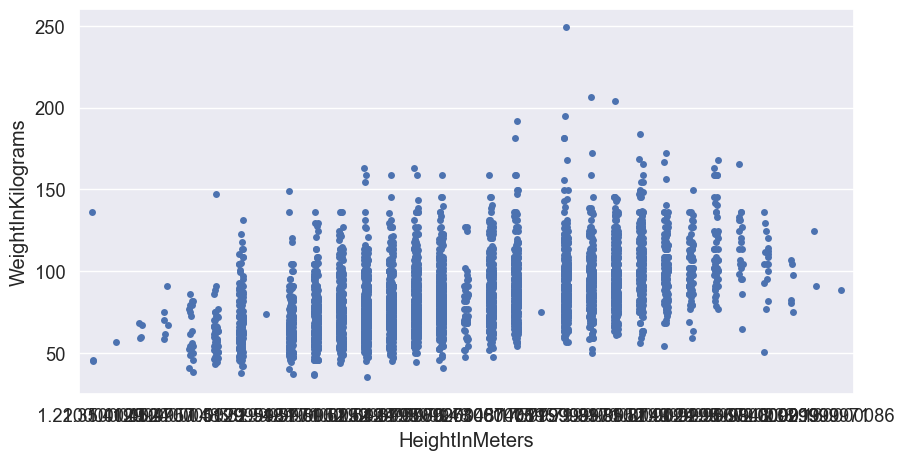

In [51]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x='HeightInMeters', y= 'WeightInKilograms',data= df)
plt.ylabel('WeightInKilograms')
plt.xlabel('HeightInMeters')

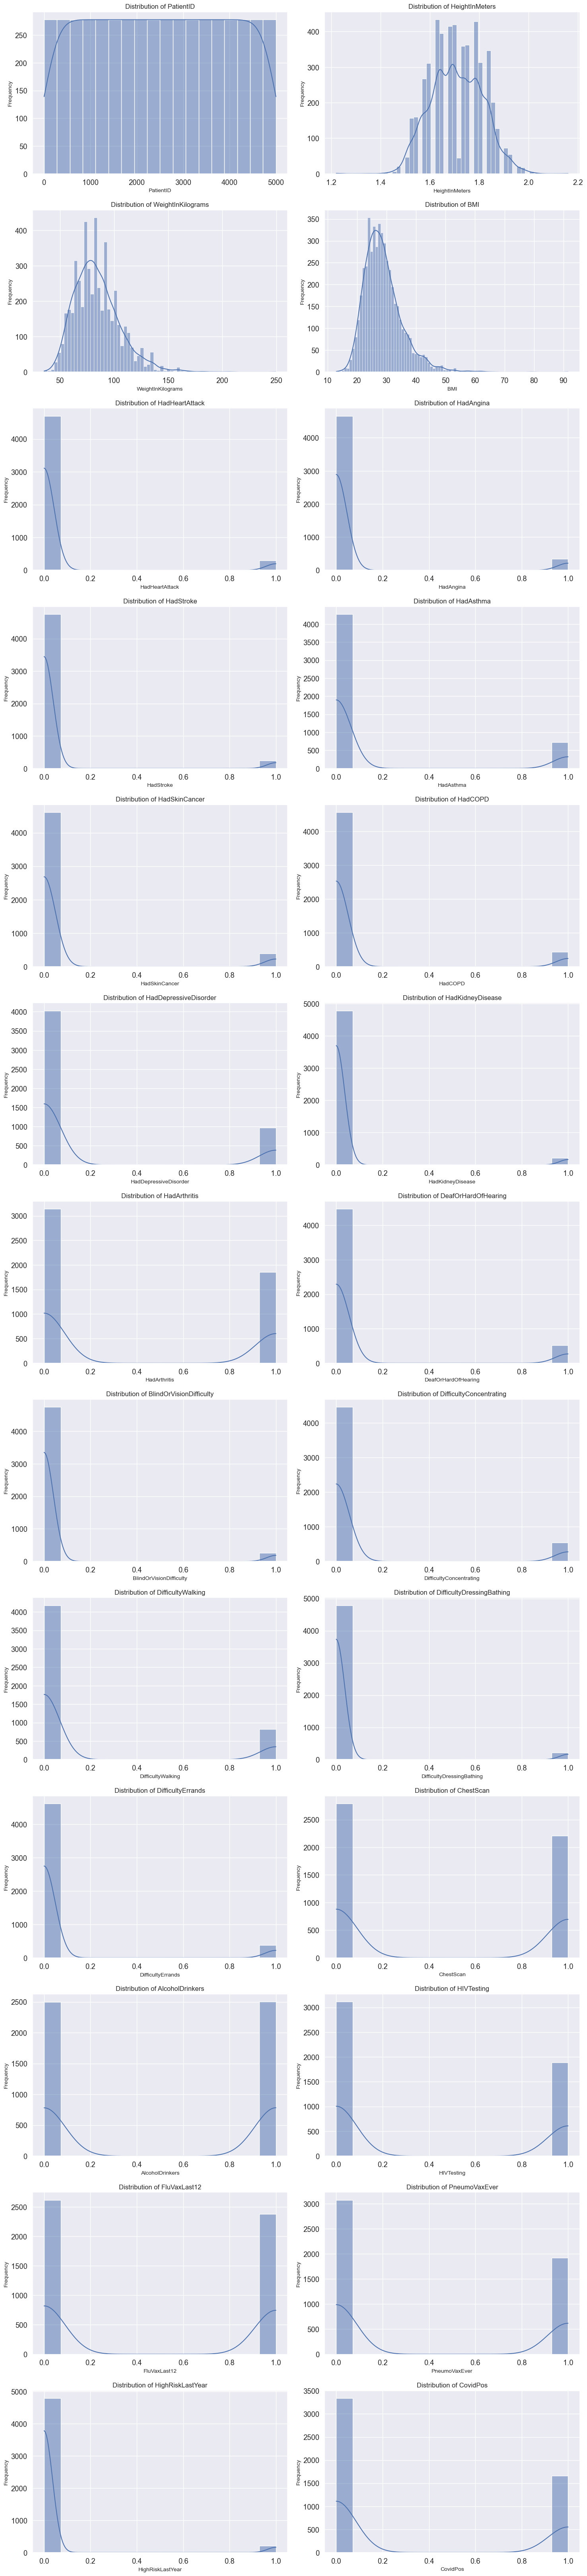

In [52]:
# Adjust the number of rows and columns dynamically based on the number of numeric features
nrows = int(np.ceil(len(num_features) / 2))  # Adjust rows based on the number of features
ncols = 2  # Fixed number of columns

# Create subplots with an appropriate figure size
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through numeric features and create histograms
for i, column in enumerate(num_features):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=12)  # Add a title
    axes[i].set_xlabel(column, fontsize=10)  # Set x-axis label
    axes[i].set_ylabel("Frequency", fontsize=10)  # Set y-axis label

# Hide any unused subplots
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

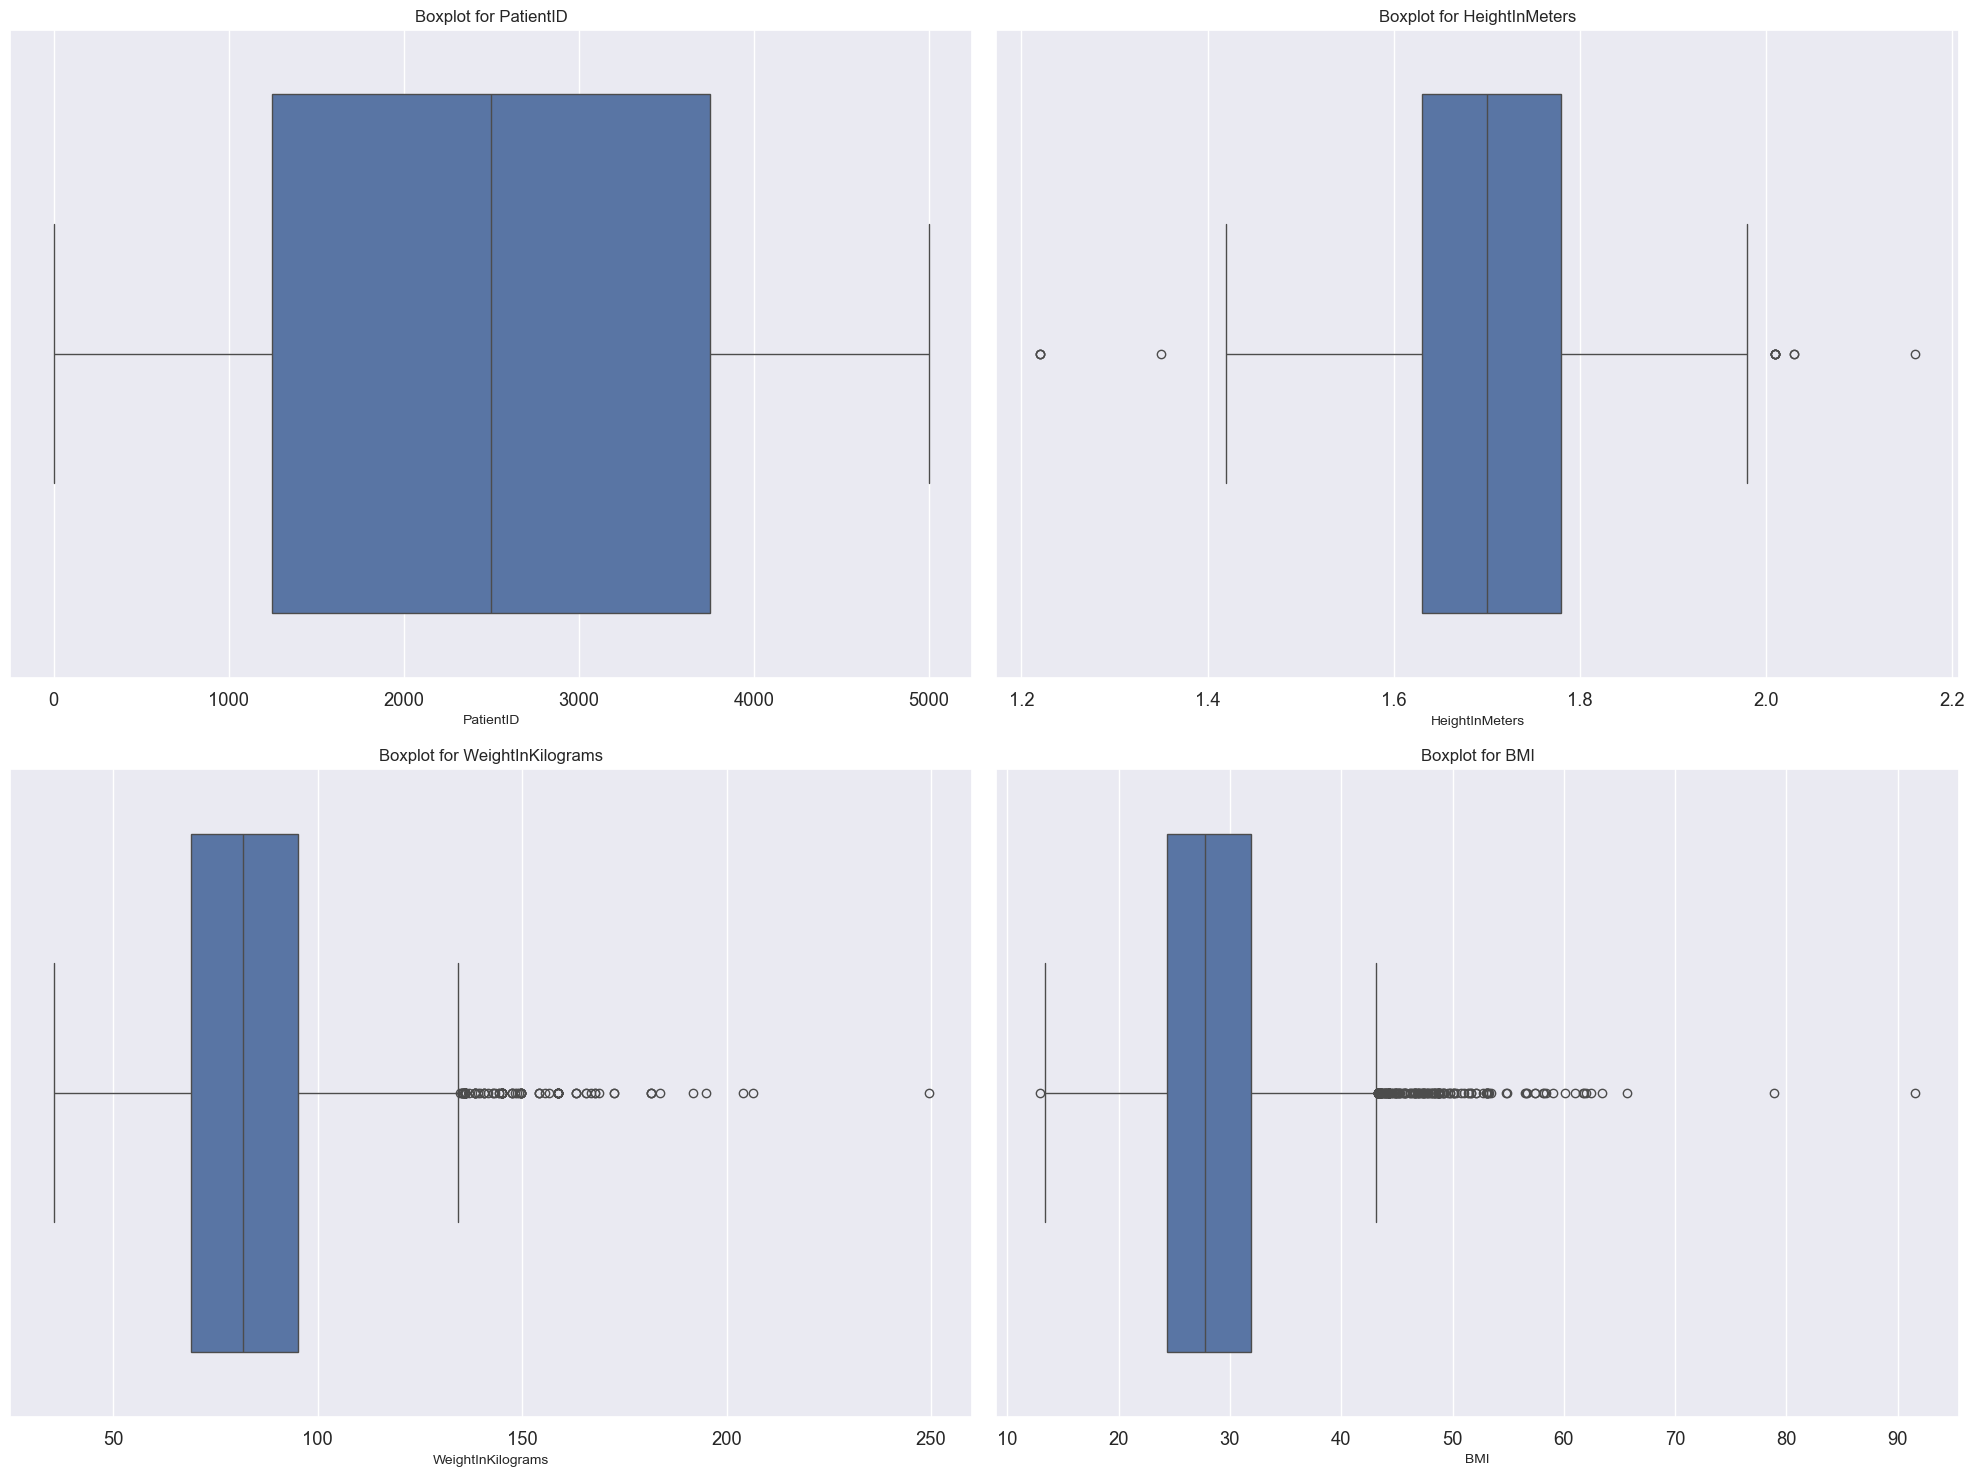

In [53]:
# Limit to the first four numeric features
limited_num_features = num_features[:4]

# Create subplots for the first four boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Loop through the first four numeric features and create boxplots
for i, column in enumerate(limited_num_features):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}", fontsize=12)  # Add a title
    axes[i].set_xlabel(column, fontsize=10)  # Set x-axis label

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

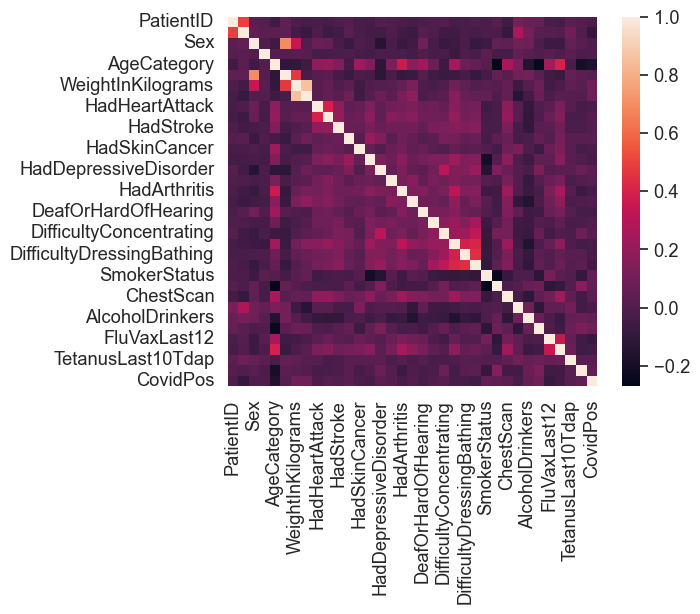

In [54]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr,annot = False, square=True, ax=ax)

C:\Users\3D\AppData\Local\Temp\ipykernel_2916\2108570112.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df, x='CovidPos', y=feature, palette='Spectral')
C:\Users\3D\AppData\Local\Temp\ipykernel_2916\2108570112.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df, x='CovidPos', y=feature, palette='Spectral')
C:\Users\3D\AppData\Local\Temp\ipykernel_2916\2108570112.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df, x='CovidPos', y=feature, palette='Spectral')
C:\Users\3D\AppData

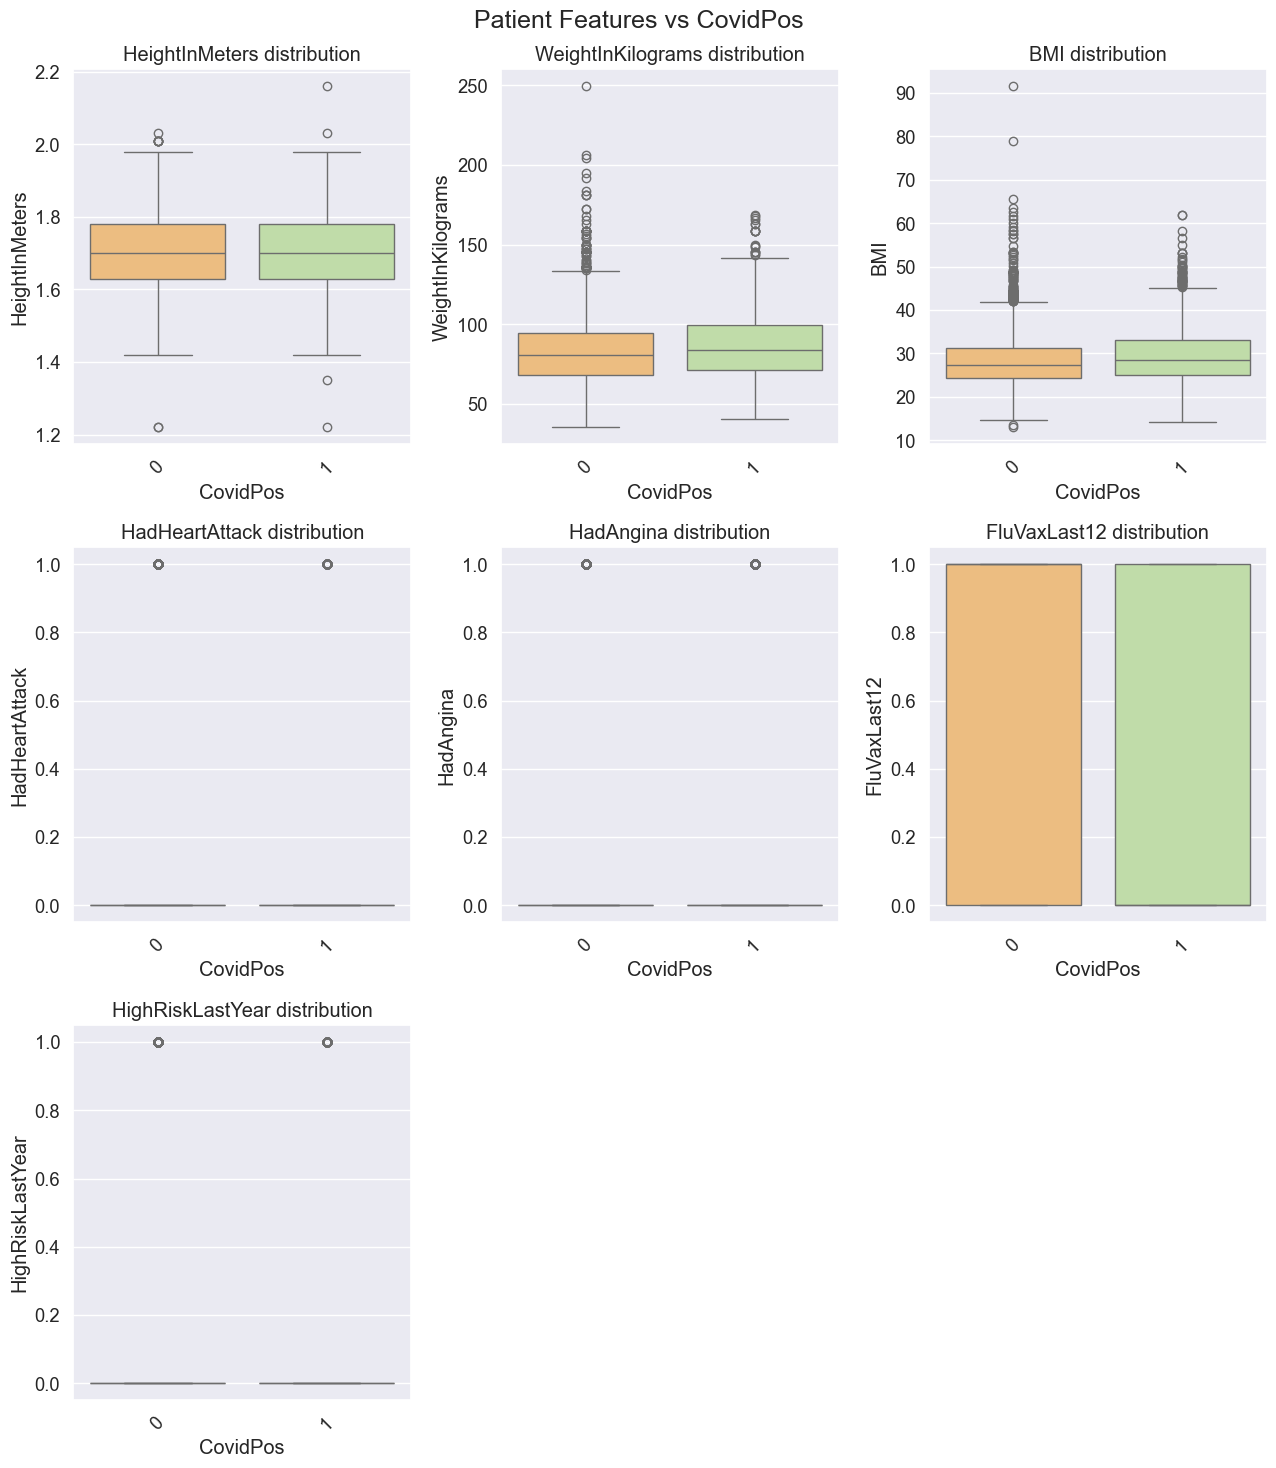

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'HighRiskLastYear'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(13, 5 * rows))
fig.suptitle('Patient Features vs CovidPos', size=18)

axes = axes.flatten() if n > 1 else [axes]

for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], data=df, x='CovidPos', y=feature, palette='Spectral')
    axes[i].set_title(f"{feature} distribution")
    axes[i].tick_params(axis='x', rotation=45)

# حذف الرسومات الفاضية إن وجدت
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



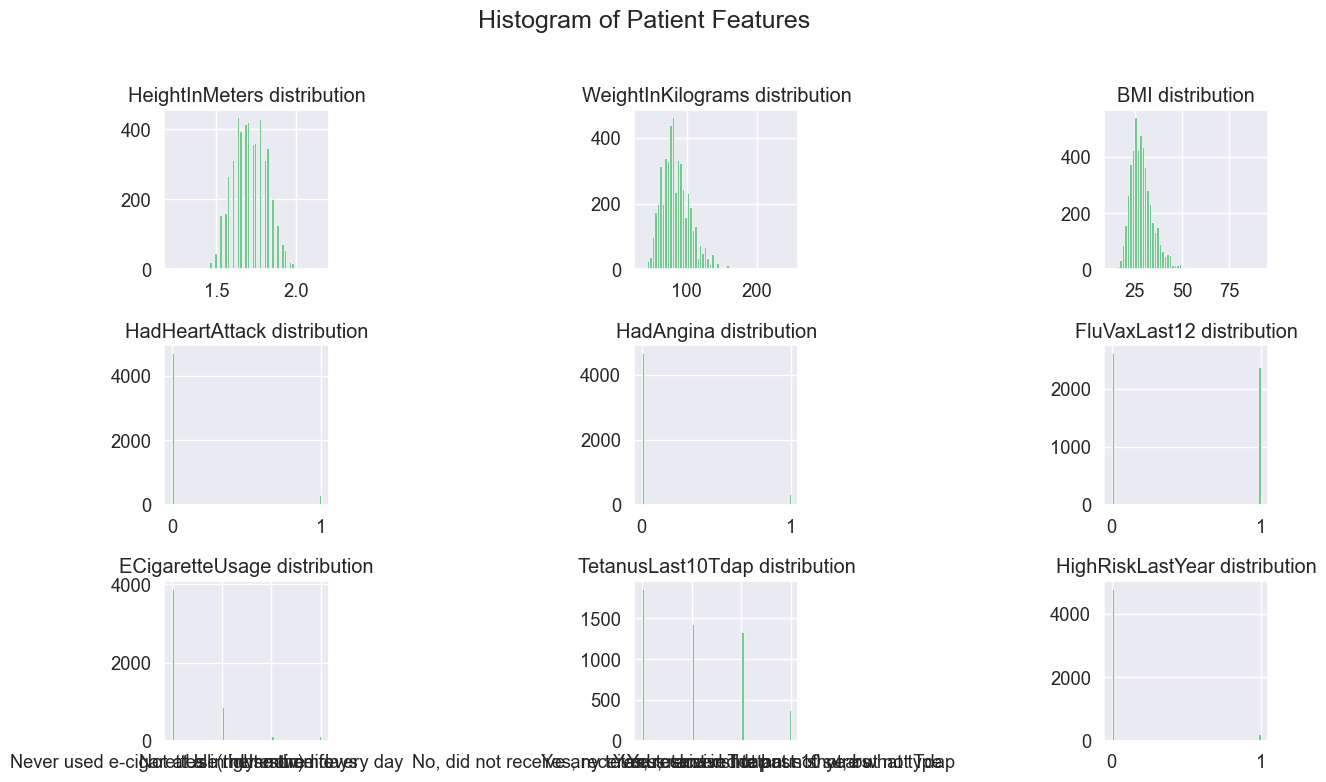

In [56]:
import matplotlib.pyplot as plt

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Histogram of Patient Features\n', size=18)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df[feature].dropna(), bins=60, linewidth=0.5, edgecolor="white", color='#76c893')
    axes[row, col].set_title(f"{feature} distribution")

plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'HighRiskLastYear'
]


def IQR_method(df, n, features):
    outlier_list = [] 
    
    for column in features:
        Q1 = np.percentile(df[column].dropna(), 25)
        Q3 = np.percentile(df[column].dropna(), 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)

        # حساب إجمالي القيم الشاذة في هذا العمود (للطباعة
        df1 = df[df[column] < Q1 - outlier_step]
        df2 = df[df[column] > Q3 + outlier_step]
        print(f"[{column}] Total outliers: {df1.shape[0] + df2.shape[0]}")
    
    # نحسب عدد مرات تكرار كل انديكس
    outlier_count = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]

    print(f"\nإجمالي الصفوف اللي فيها أكثر من {n} قيمة شاذة: {len(multiple_outliers)}")
    return multiple_outliers

outliers = IQR_method(df, n=1, features=features)

# عرض أول 5 صفوف من الـ outliers
print("\nأول 5 صفوف شاذة:")
print(df.loc[outliers].head())


[HeightInMeters] Total outliers: 13
[WeightInKilograms] Total outliers: 127
[BMI] Total outliers: 164
[HadHeartAttack] Total outliers: 297
[HadAngina] Total outliers: 341
[FluVaxLast12] Total outliers: 0
[HighRiskLastYear] Total outliers: 205

إجمالي الصفوف اللي فيها أكثر من 1 قيمة شاذة: 249

أول 5 صفوف شاذة:
      PatientID    State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
1157       1158  Alabama  Female          Good  Age 50 to 54            1.22   
1376       1377   Alaska    Male          Good  Age 18 to 24            2.01   
1563       1564  Alabama  Female          Poor  Age 65 to 69            1.22   
3501       3502   Alaska    Male          Good  Age 40 to 44            2.16   
39           40  Alabama  Female          Fair  Age 40 to 44            1.83   

      WeightInKilograms        BMI  HadHeartAttack  HadAngina  ...  \
1157          45.810001  30.820000             0.0          0  ...   
1376         104.330002  25.910000             0.0          0  ...  

In [58]:
Outliers_IQR = IQR_method(df,1,features)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

[HeightInMeters] Total outliers: 13
[WeightInKilograms] Total outliers: 127
[BMI] Total outliers: 164
[HadHeartAttack] Total outliers: 297
[HadAngina] Total outliers: 341
[FluVaxLast12] Total outliers: 0
[HighRiskLastYear] Total outliers: 205

إجمالي الصفوف اللي فيها أكثر من 1 قيمة شاذة: 249


[HeightInMeters] Total outliers: 13
[WeightInKilograms] Total outliers: 127
[BMI] Total outliers: 164
[HadHeartAttack] Total outliers: 297
[HadAngina] Total outliers: 341
[FluVaxLast12] Total outliers: 0
⚠️ العمود ECigaretteUsage فارغ تمامًا بعد التنظيف! تم تخطيه.
⚠️ العمود TetanusLast10Tdap فارغ تمامًا بعد التنظيف! تم تخطيه.
[HighRiskLastYear] Total outliers: 205

  الصفوف اللي فيها أكثر من 1 outlier: 249


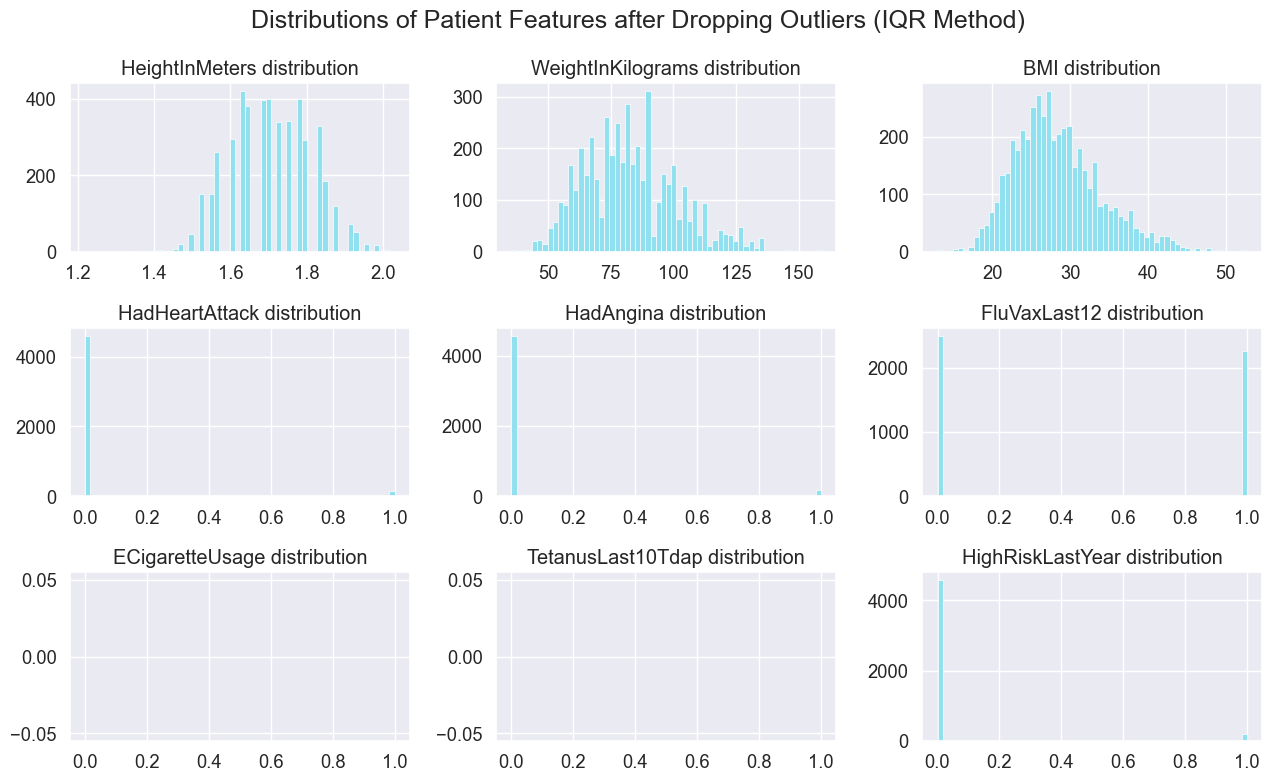

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]


for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')


def IQR_method(df, n, features):
    outlier_list = [] 
    for column in features:
        col_data = df[column].dropna()
        if col_data.empty:
            print(f"⚠️ العمود {column} فارغ تمامًا بعد التنظيف! تم تخطيه.")
            continue
        Q1 = np.percentile(col_data, 25)
        Q3 = np.percentile(col_data, 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)
        print(f"[{column}] Total outliers: {len(outlier_list_column)}")
    outlier_count = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]
    print(f"\n  الصفوف اللي فيها أكثر من {n} outlier: {len(multiple_outliers)}")
    return multiple_outliers

outlier_indices = IQR_method(df, n=1, features=features)
df_out = df.drop(index=outlier_indices).reset_index(drop=True)

if df_out.empty:
    print(" مفيش بيانات بعد حذف القيم الشاذة! جرّبي تقللي n أو تأكدي من الأعمدة.")
else:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
    fig.suptitle('Distributions of Patient Features after Dropping Outliers (IQR Method)', size=18)

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(df_out[feature].dropna(), bins=60, linewidth=0.5, edgecolor="white", color="#90e0ef")
        axes[row, col].set_title(f"{feature} distribution")

    plt.tight_layout()
    plt.show()


[HeightInMeters] Total outliers: 7
[WeightInKilograms] Total outliers: 48
[BMI] Total outliers: 64
[HadHeartAttack] Total outliers: 297
[HadAngina] Total outliers: 341
[FluVaxLast12] Total outliers: 0
⚠️ العمود ECigaretteUsage فاضي بعد التنظيف. تم تخطيه.
⚠️ العمود TetanusLast10Tdap فاضي بعد التنظيف. تم تخطيه.
[HighRiskLastYear] Total outliers: 205

 الصفوف اللي فيها أكثر من 1 outlier (StDev): 192


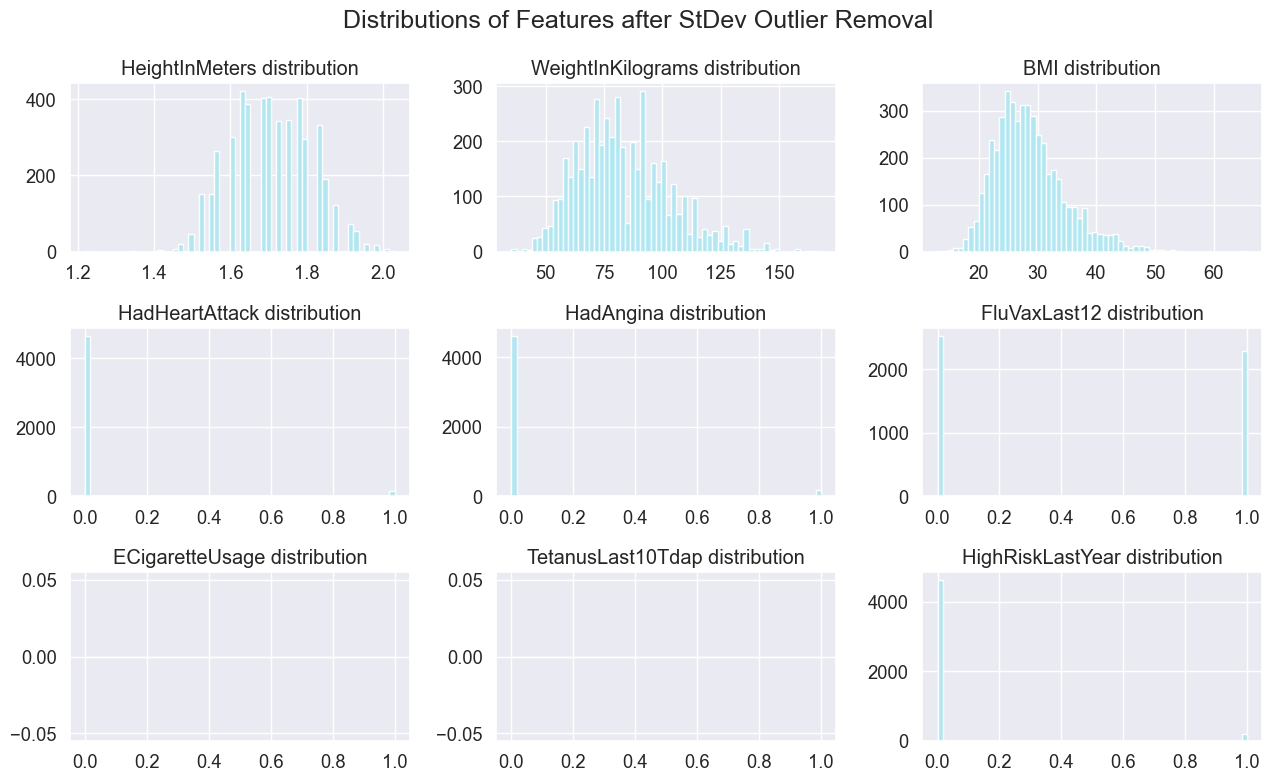

In [60]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 1. قراءة البيانات
df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

# 2. الأعمدة الرقمية
features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

# 3. تحويل الأعمدة إلى أرقام مع تجاهل القيم النصية
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. دالة StDev Method
def StDev_method(df, n, features):
    outlier_indices = []
    
    for column in features:
        col_data = df[column].dropna()
        if col_data.empty:
            print(f"⚠️ العمود {column} فاضي بعد التنظيف. تم تخطيه.")
            continue
        data_mean = col_data.mean()
        data_std = col_data.std()
        cut_off = data_std * 3

        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_indices.extend(outlier_list_column)

        print(f"[{column}] Total outliers: {len(outlier_list_column)}")
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n]

    print(f"\n الصفوف اللي فيها أكثر من {n} outlier (StDev): {len(multiple_outliers)}")
    return multiple_outliers

# 5. تطبيق الدالة وحذف القيم الشاذة
outliers_stdev = StDev_method(df, n=1, features=features)
df_out2 = df.drop(index=outliers_stdev).reset_index(drop=True)

# 6. رسم histogram بعد حذف الـ outliers
if df_out2.empty:
    print(" مفيش بيانات بعد حذف outliers بطريقة StDev! قلل n أو راجع الأعمدة.")
else:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
    fig.suptitle('Distributions of Features after StDev Outlier Removal', size=18)

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(df_out2[feature].dropna(), bins=60, edgecolor='white', color='#ade8f4')
        axes[row, col].set_title(f"{feature} distribution")

    plt.tight_layout()
    plt.show()


In [61]:
import pandas as pd
import numpy as np
from collections import Counter

# 1. قراءة البيانات وتنظيف أسماء الأعمدة
df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

# 2. الأعمدة الرقمية اللي هنشتغل عليها
feature_list = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

# 3. تحويل كل الأعمدة الرقمية لنوع float
for col in feature_list:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. دالة الكشف عن القيم الشاذة باستخدام الانحراف المعياري
def StDev_method(df, n, features):
    outlier_indices = []
    
    for column in features:
        col_data = df[column].dropna()
        if col_data.empty:
            print(f"⚠️ العمود {column} فارغ تمامًا بعد التنظيف، تم تخطيه.")
            continue
        
        data_mean = col_data.mean()
        data_std = col_data.std()
        cut_off = data_std * 3
        
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_indices.extend(outlier_list_column)
        
        print(f"[{column}] عدد القيم الشاذة: {len(outlier_list_column)}")
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n]

    print(f"\n الصفوف اللي فيها أكثر من {n} outlier: {len(multiple_outliers)}")

    return multiple_outliers

# 5. تطبيق الدالة
Outliers_StDev = StDev_method(df, 1, feature_list)

# 6. حذف الصفوف الشاذة
df_out2 = df.drop(index=Outliers_StDev).reset_index(drop=True)

# 7. طباعة النتيجة النهائية
print(f"\n✅ تم حذف {len(Outliers_StDev)} صف من البيانات. المتبقي: {df_out2.shape[0]} صف.")


[HeightInMeters] عدد القيم الشاذة: 7
[WeightInKilograms] عدد القيم الشاذة: 48
[BMI] عدد القيم الشاذة: 64
[HadHeartAttack] عدد القيم الشاذة: 297
[HadAngina] عدد القيم الشاذة: 341
[FluVaxLast12] عدد القيم الشاذة: 0
⚠️ العمود ECigaretteUsage فارغ تمامًا بعد التنظيف، تم تخطيه.
⚠️ العمود TetanusLast10Tdap فارغ تمامًا بعد التنظيف، تم تخطيه.
[HighRiskLastYear] عدد القيم الشاذة: 205

 الصفوف اللي فيها أكثر من 1 outlier: 192

✅ تم حذف 192 صف من البيانات. المتبقي: 4807 صف.


The lower bound value is: 9.33961086302736
The upper bound value is: 48.24545915993219


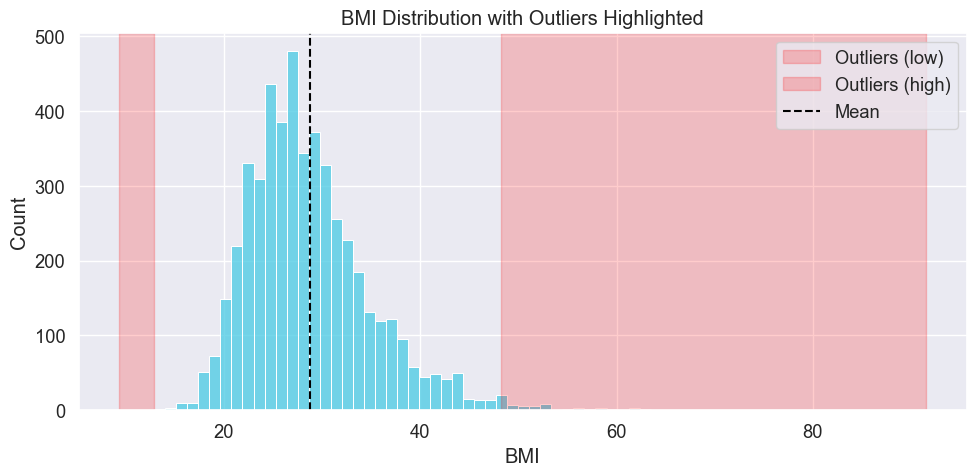

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات
df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()

df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

# حساب المتوسط والانحراف المعياري والحدود
data_mean, data_std = df['BMI'].mean(), df['BMI'].std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', lower)
print('The upper bound value is:', upper)

plt.figure(figsize=(10, 5))
sns.histplot(x='BMI', data=df, bins=70, color='#48cae4', edgecolor='white')
plt.axvspan(xmin=df['BMI'].min(), xmax=lower, alpha=0.2, color='red', label='Outliers (low)')
plt.axvspan(xmin=upper, xmax=df['BMI'].max(), alpha=0.2, color='red', label='Outliers (high)')
plt.axvline(data_mean, color='black', linestyle='--', label='Mean')
plt.title("BMI Distribution with Outliers Highlighted")
plt.legend()
plt.tight_layout()
plt.show()


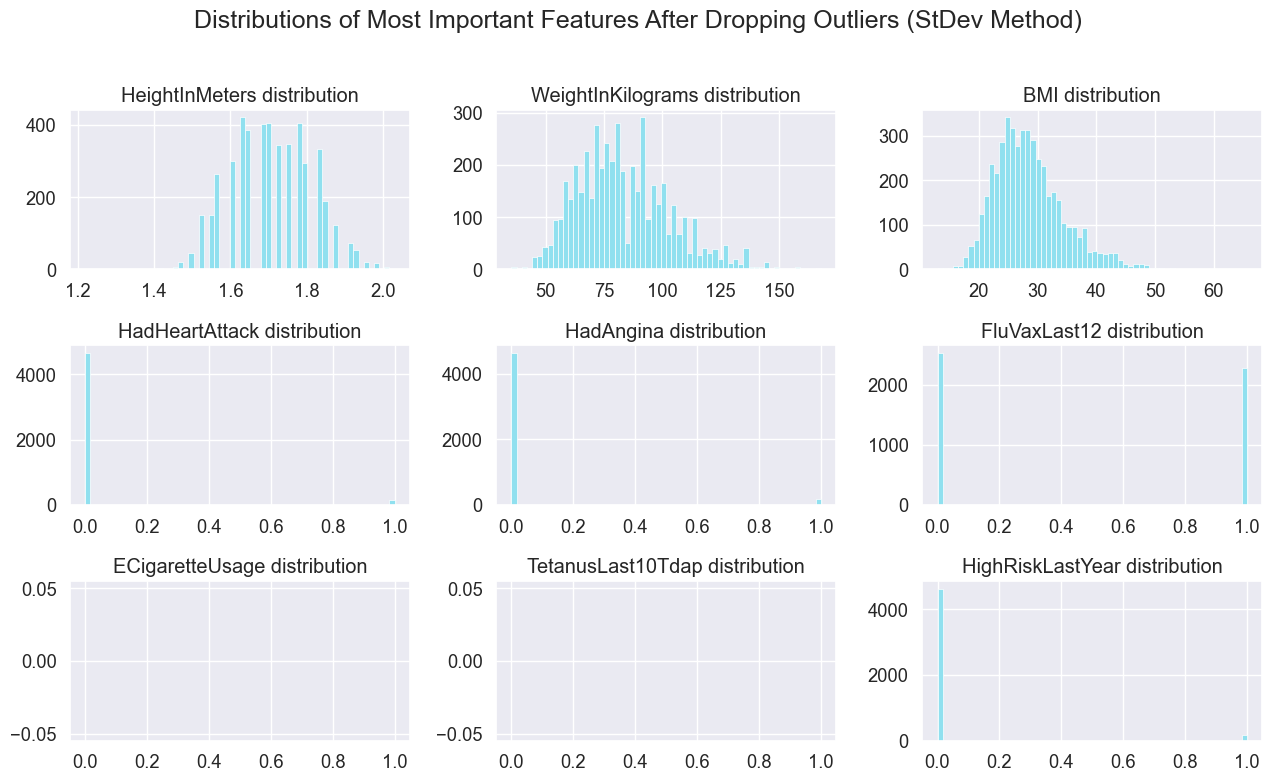

In [63]:
import matplotlib.pyplot as plt

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features After Dropping Outliers (StDev Method)\n', size=18)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df_out2[feature].dropna(), bins=60, linewidth=0.5, edgecolor="white", color="#90e0ef")
    axes[row, col].set_title(f"{feature} distribution")

plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
import numpy as np
from collections import Counter

# 1. تحميل البيانات
df = pd.read_csv("patient data.csv", on_bad_lines='skip')
df.columns = df.columns.str.strip()


features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]


for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. تعريف دالة z-score
def z_score_method(df, n, features):
    outlier_list = []
    threshold = 3
    
    for column in features:
        col_data = df[column].dropna()
        if col_data.empty:
            print(f"⚠️ العمود {column} فاضي بعد التنظيف، تم تخطيه.")
            continue

        data_mean = col_data.mean()
        data_std = col_data.std()
        z_score = abs((df[column] - data_mean) / data_std)
        
        outlier_list_column = df[z_score > threshold].index
        outlier_list.extend(outlier_list_column)

        print(f"[{column}] عدد القيم الشاذة: {len(outlier_list_column)}")

    outlier_list = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_list.items() if v > n]
    
    print(f"\n الصفوف اللي فيها أكثر من {n} قيمة شاذة (Z-score): {len(multiple_outliers)}")
    return multiple_outliers

# 5. تطبيق الدالة وحذف القيم الشاذة
outliers_z = z_score_method(df, n=1, features=features)
df_out_z = df.drop(index=outliers_z).reset_index(drop=True)

# 6. النتيجة النهائية
print(f"\n✅ بعد حذف {len(outliers_z)} صف، البيانات المتبقية: {df_out_z.shape[0]} صف.")


[HeightInMeters] عدد القيم الشاذة: 7
[WeightInKilograms] عدد القيم الشاذة: 48
[BMI] عدد القيم الشاذة: 64
[HadHeartAttack] عدد القيم الشاذة: 297
[HadAngina] عدد القيم الشاذة: 341
[FluVaxLast12] عدد القيم الشاذة: 0
⚠️ العمود ECigaretteUsage فاضي بعد التنظيف، تم تخطيه.
⚠️ العمود TetanusLast10Tdap فاضي بعد التنظيف، تم تخطيه.
[HighRiskLastYear] عدد القيم الشاذة: 205

 الصفوف اللي فيها أكثر من 1 قيمة شاذة (Z-score): 192

✅ بعد حذف 192 صف، البيانات المتبقية: 4807 صف.


In [65]:
Outliers_z_score = z_score_method(df,1,feature_list)

df_out3 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

[HeightInMeters] عدد القيم الشاذة: 7
[WeightInKilograms] عدد القيم الشاذة: 48
[BMI] عدد القيم الشاذة: 64
[HadHeartAttack] عدد القيم الشاذة: 297
[HadAngina] عدد القيم الشاذة: 341
[FluVaxLast12] عدد القيم الشاذة: 0
⚠️ العمود ECigaretteUsage فاضي بعد التنظيف، تم تخطيه.
⚠️ العمود TetanusLast10Tdap فاضي بعد التنظيف، تم تخطيه.
[HighRiskLastYear] عدد القيم الشاذة: 205

 الصفوف اللي فيها أكثر من 1 قيمة شاذة (Z-score): 192


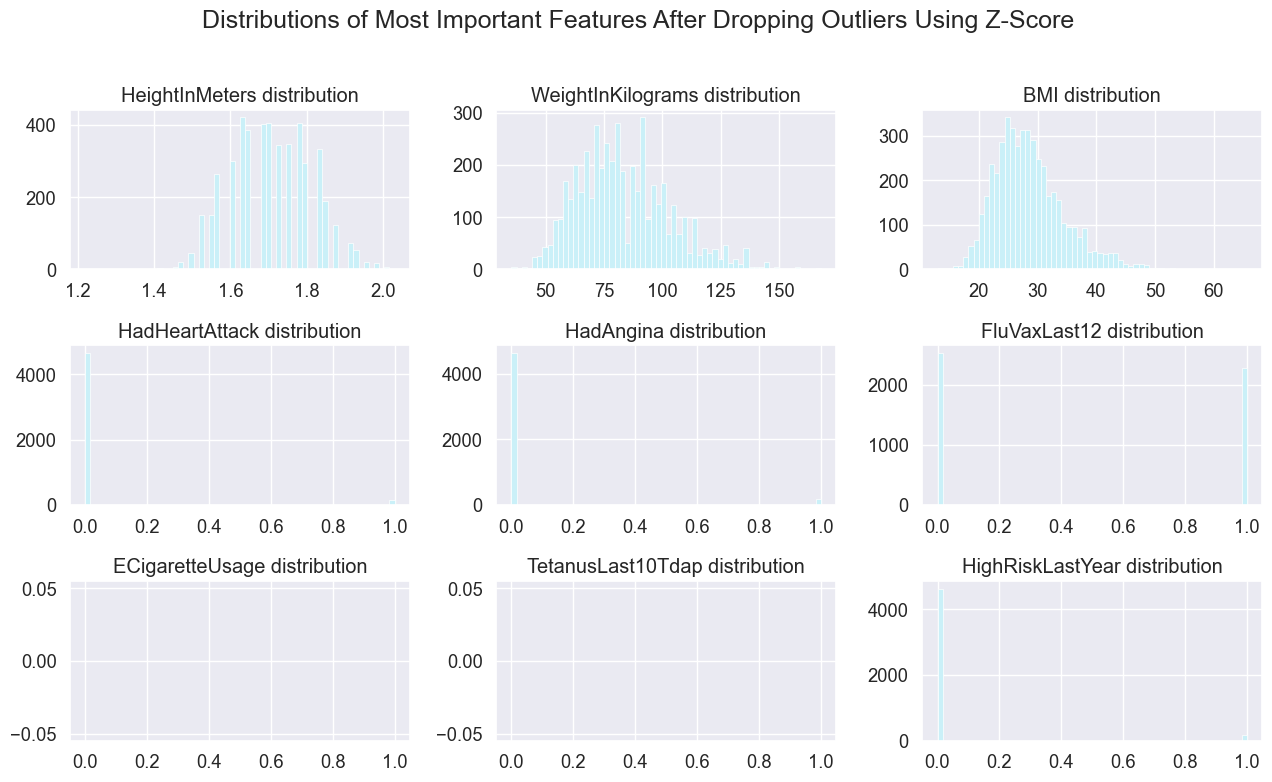

In [66]:
import matplotlib.pyplot as plt

features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features After Dropping Outliers Using Z-Score\n', size=18)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df_out_z[feature].dropna(), bins=60, linewidth=0.5, edgecolor="white", color="#caf0f8")
    axes[row, col].set_title(f"{feature} distribution")

plt.tight_layout()
plt.show()


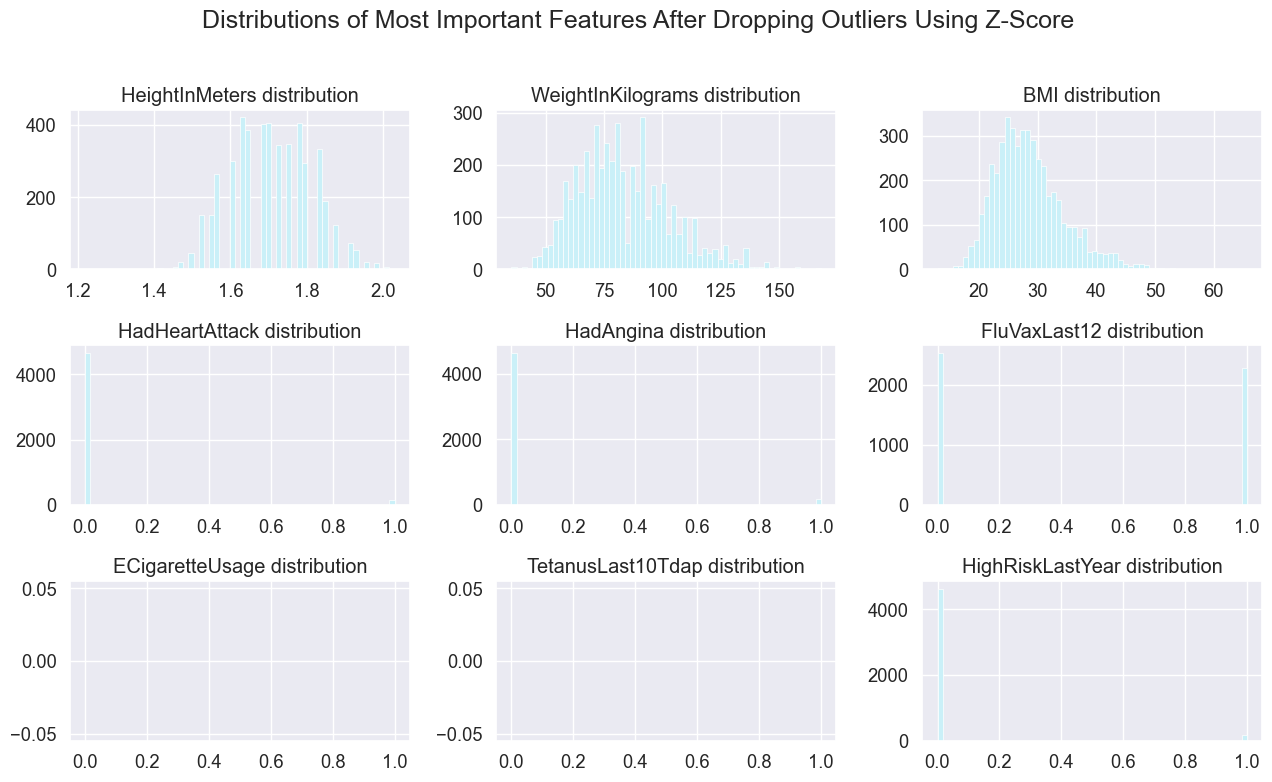

In [67]:
import matplotlib.pyplot as plt



features = [
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HadHeartAttack',
    'HadAngina',
    'FluVaxLast12',
    'ECigaretteUsage',
    'TetanusLast10Tdap',
    'HighRiskLastYear'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features After Dropping Outliers Using Z-Score\n', size=18)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df_out_z[feature].dropna(), bins=60, linewidth=0.5, edgecolor="white", color="#caf0f8")
    axes[row, col].set_title(f"{feature} distribution")

plt.tight_layout()
plt.show()


In [68]:
Outliers_z_score = z_score_method(df,1,feature_list)

df_out4 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

[HeightInMeters] عدد القيم الشاذة: 7
[WeightInKilograms] عدد القيم الشاذة: 48
[BMI] عدد القيم الشاذة: 64
[HadHeartAttack] عدد القيم الشاذة: 297
[HadAngina] عدد القيم الشاذة: 341
[FluVaxLast12] عدد القيم الشاذة: 0
⚠️ العمود ECigaretteUsage فاضي بعد التنظيف، تم تخطيه.
⚠️ العمود TetanusLast10Tdap فاضي بعد التنظيف، تم تخطيه.
[HighRiskLastYear] عدد القيم الشاذة: 205

 الصفوف اللي فيها أكثر من 1 قيمة شاذة (Z-score): 192


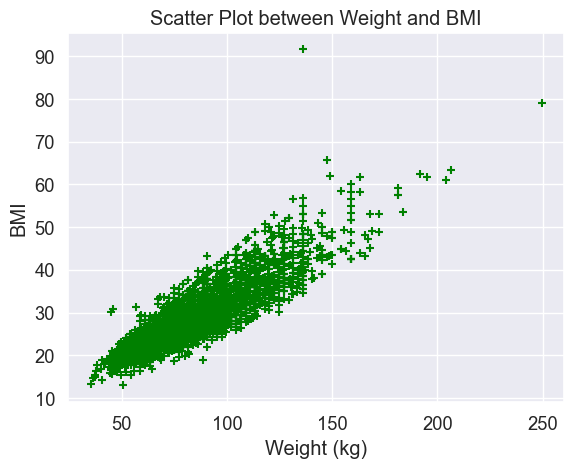

In [69]:

plt.xlabel("Weight (kg)")
plt.ylabel("BMI")
plt.scatter(df['WeightInKilograms'], df['BMI'], color="green", marker="+")
plt.title("Scatter Plot between Weight and BMI")
plt.show()


In [70]:
df.select_dtypes(include='object').columns


Index(['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadDiabetes',
       'SmokerStatus', 'RaceEthnicityCategory'],
      dtype='object')

In [71]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,1,1.63,84.820000,32.099998,0.0,1,0,1,1,0,...,False,True,False,False,True,False,False,False,False,True
1,2,1.60,71.669998,27.990000,NaN,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
2,3,1.78,71.209999,22.530001,0.0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,True
3,4,1.78,95.250000,30.129999,0.0,0,0,0,0,0,...,False,True,False,False,True,False,False,False,False,True
4,5,1.68,78.019997,27.760000,0.0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [72]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()


categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,1,11,1.63,84.820000,32.099998,0.0,1,...,NaN,1,4,0,0,0,1,NaN,0,1
1,2,0,0,4,9,1.60,71.669998,27.990000,NaN,0,...,NaN,0,4,0,0,1,1,NaN,0,0
2,3,0,1,0,8,1.78,71.209999,22.530001,0.0,0,...,NaN,0,4,1,0,0,0,NaN,0,0
3,4,0,1,4,10,1.78,95.250000,30.129999,0.0,0,...,NaN,0,4,0,0,1,1,NaN,0,0
4,5,0,0,2,6,1.68,78.019997,27.760000,0.0,0,...,NaN,1,0,0,0,1,0,NaN,0,0


In [73]:
print(df.columns)

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [74]:
X.isna().sum()

PatientID                     0
State                         0
Sex                           0
GeneralHealth                 0
AgeCategory                   0
HeightInMeters               45
WeightInKilograms             1
BMI                           5
HadHeartAttack                5
HadAngina                     0
HadStroke                     0
HadAsthma                     0
HadSkinCancer                 0
HadCOPD                       0
HadDepressiveDisorder         0
HadKidneyDisease              0
HadArthritis                  0
DeafOrHardOfHearing           0
BlindOrVisionDifficulty       0
DifficultyConcentrating       0
DifficultyWalking             0
DifficultyDressingBathing     1
DifficultyErrands             0
SmokerStatus                  0
ECigaretteUsage               0
ChestScan                     0
RaceEthnicityCategory         0
AlcoholDrinkers               0
HIVTesting                    0
FluVaxLast12                  0
PneumoVaxEver                 0
TetanusL

EPS = 0.5 -> عدد الكلاسترز: 3
EPS = 1.0 -> عدد الكلاسترز: 1
EPS = 1.5 -> عدد الكلاسترز: 1


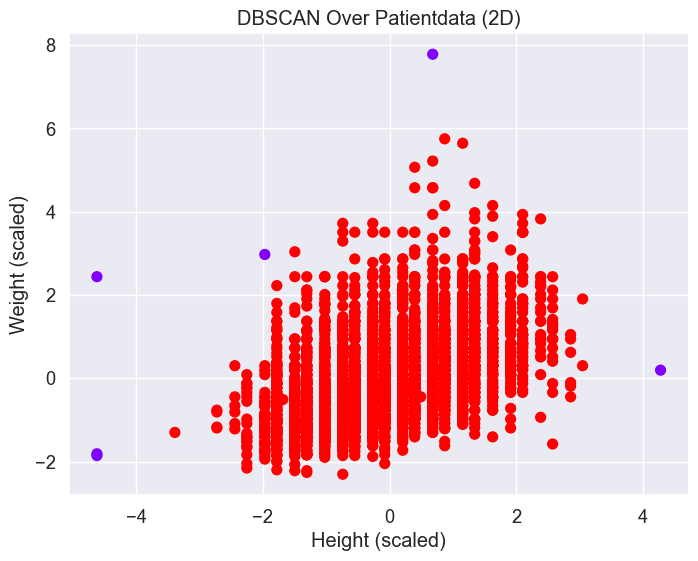

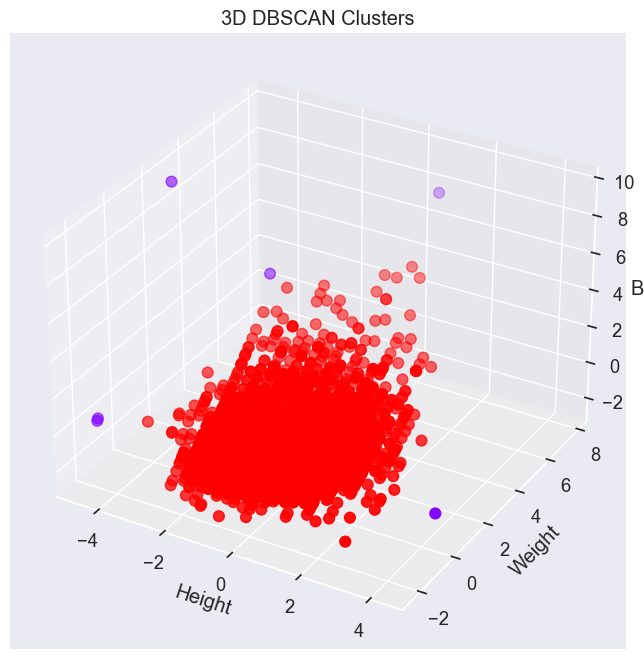


عدد الكلاسترز: 1
عدد النقاط الخارجة (Noise): 6
  Noise: 6
  Cluster 0: 4944 نقطة

لا يمكن حساب Silhouette Score بسبب وجود Noise أو فقط Cluster واحد.


In [75]:
#Using DBSCAN model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


# اختيار بعض الأعمدة الرقمية لتحليل DBSCAN
features = ['HeightInMeters', 'WeightInKilograms', 'BMI']
df_clean = df[features].dropna()  # حذف القيم الفارغة

# توحيد القيم
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# تجربة DBSCAN بعدة قيم
for eps in [0.5, 1.0, 1.5]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(data_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"EPS = {eps} -> عدد الكلاسترز: {n_clusters}")

# استخدام القيمة المناسبة مثلاً eps = 1.0
db = DBSCAN(eps=1.0, min_samples=5)
labels = db.fit_predict(data_scaled)

# رسم ثنائي الأبعاد
plt.figure(figsize=(8,6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='rainbow', s=50)
plt.xlabel("Height (scaled)")
plt.ylabel("Weight (scaled)")
plt.title("DBSCAN Over Patientdata (2D)")
plt.grid(True)
plt.show()

# رسم ثلاثي الأبعاد
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=labels, cmap='rainbow', s=60)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')
ax.set_title('3D DBSCAN Clusters')
plt.show()

# تحليل النتائج
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\nعدد الكلاسترز: {n_clusters}")
print(f"عدد النقاط الخارجة (Noise): {n_noise}")

unique, counts = np.unique(labels, return_counts=True)
cluster_stats = dict(zip(unique, counts))
for label, count in cluster_stats.items():
    if label == -1:
        print(f"  Noise: {count}")
    else:
        print(f"  Cluster {label}: {count} نقطة")

# Silhouette Score
if len(set(labels)) > 1 and -1 not in labels:
    score = silhouette_score(data_scaled, labels)
    print(f"\nSilhouette Score: {score:.2f}")
else:
    print("\nلا يمكن حساب Silhouette Score بسبب وجود Noise أو فقط Cluster واحد.")


In [76]:
df.sample()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
1946,1947,1,0,4,10,1.68,72.57,25.82,0.0,0,...,NaN,0,4,0,1,0,1,NaN,0,0


In [77]:
df = df[df['HadDiabetes'].isin([0,2])]

In [78]:
#Random forest train_test_split

X = df.drop('HadDiabetes', axis=1)
y = df['HadDiabetes']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\n",cm)


Accuracy : 0.8350409836065574
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       815
           2       0.50      0.09      0.15       161

    accuracy                           0.84       976
   macro avg       0.67      0.53      0.53       976
weighted avg       0.79      0.84      0.78       976


 [[801  14]
 [147  14]]


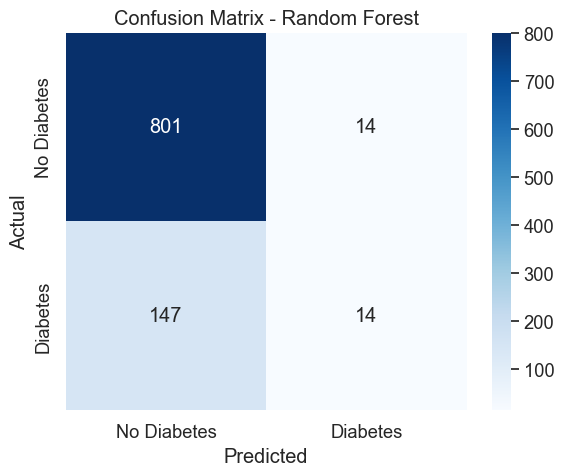

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

In [80]:
# Random Forest k folds
dfrandomforest=df.drop(columns=["PatientID"])


# Encode all categorical columns
for col in dfrandomforest.columns:
    if dfrandomforest[col].dtype == 'object':
        le = LabelEncoder()
        dfrandomforest[col] = le.fit_transform(dfrandomforest[col])

# Split features and target
X = dfrandomforest.drop(columns=["HadDiabetes"])
y = dfrandomforest["HadDiabetes"]

# K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model_choice = "RF"  # Change to "DT" if you want Decision Tree
fold = 1

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    if model_choice == "DT":
        model = DecisionTreeClassifier(random_state=42)
    else:
        model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n Fold {fold} Accuracy: {acc:.4f}")
    print(f" Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}")
    fold += 1

cm = confusion_matrix(y_test, y_pred)
print("\n",cm)


 Fold 1 Accuracy: 0.8350
 Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       815
           2       0.50      0.09      0.16       161

    accuracy                           0.84       976
   macro avg       0.67      0.54      0.53       976
weighted avg       0.79      0.84      0.78       976


 Fold 2 Accuracy: 0.8514
 Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       839
           2       0.35      0.07      0.11       137

    accuracy                           0.85       976
   macro avg       0.61      0.52      0.51       976
weighted avg       0.79      0.85      0.81       976


 Fold 3 Accuracy: 0.8658
 Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       841
           2       0.60      0.09      0.15       135

    accurac

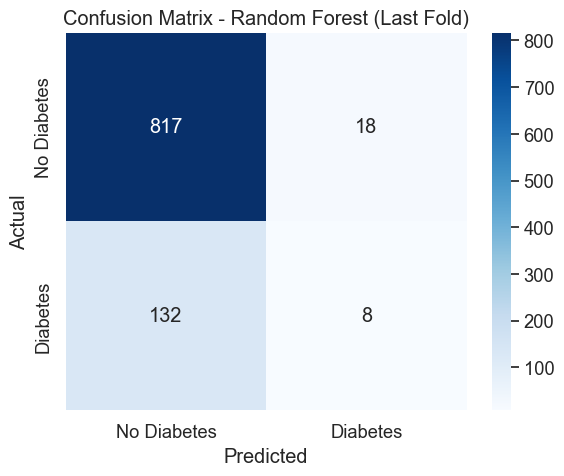

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Diabetes', 'Diabetes']

# Simple plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Last Fold)')
plt.tight_layout()
plt.show()

In [82]:
# Decision Tree k folds
dfrandomforest=df.drop(columns=["PatientID"])


# Encode all categorical columns
for col in dfrandomforest.columns:
    if dfrandomforest[col].dtype == 'object':
        le = LabelEncoder()
        dfrandomforest[col] = le.fit_transform(dfrandomforest[col])

# Split features and target
X = dfrandomforest.drop(columns=["HadDiabetes"])
y = dfrandomforest["HadDiabetes"]

# K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model_choice = "DT"  # Change to "DT" if you want Decision Tree
fold = 1

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    if model_choice == "DT":
        model = DecisionTreeClassifier(random_state=42)
    else:
        model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n Fold {fold} Accuracy: {acc:.4f}")
    print(f" Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}")
    fold += 1
cm = confusion_matrix(y_test, y_pred)
print("\n",cm)


 Fold 1 Accuracy: 0.7715
 Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       815
           2       0.30      0.29      0.29       161

    accuracy                           0.77       976
   macro avg       0.58      0.58      0.58       976
weighted avg       0.77      0.77      0.77       976


 Fold 2 Accuracy: 0.7654
 Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       839
           2       0.22      0.27      0.24       137

    accuracy                           0.77       976
   macro avg       0.55      0.56      0.55       976
weighted avg       0.78      0.77      0.77       976


 Fold 3 Accuracy: 0.7859
 Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       841
           2       0.30      0.40      0.34       135

    accurac

Top 10 Key Features:
                  Feature  Importance
7                     BMI    0.125416
0               PatientID    0.105980
6       WeightInKilograms    0.101582
4             AgeCategory    0.082360
5          HeightInMeters    0.077738
3           GeneralHealth    0.048450
26  RaceEthnicityCategory    0.033312
23           SmokerStatus    0.030506
1                   State    0.028169
27        AlcoholDrinkers    0.024550


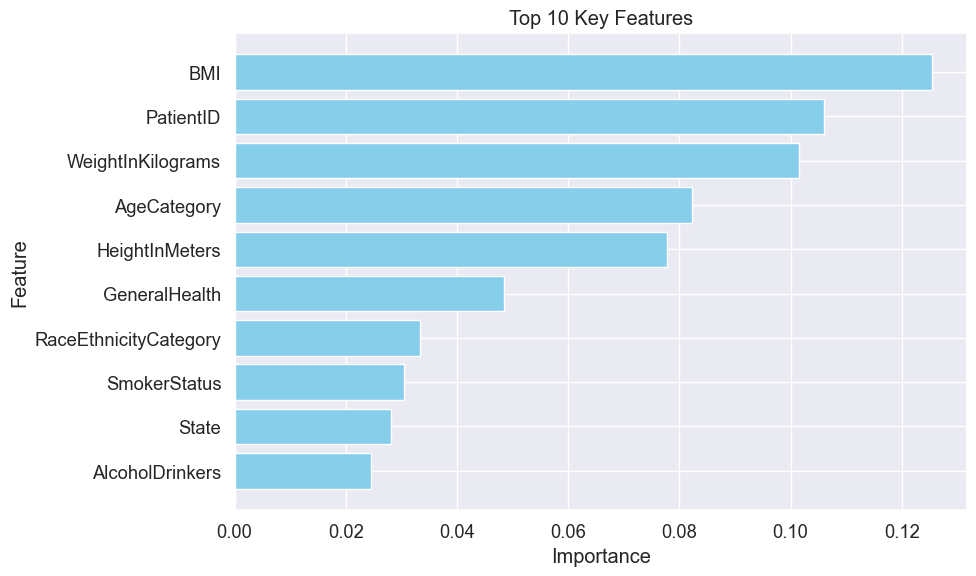

In [85]:
# Train a Random Forest model and extract feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset and 'HadDiabetes' is the target column
target_column = 'HadDiabetes'
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Key Features:")
print(importance_df.head(10))

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Key Features')
plt.tight_layout()
plt.show()